[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 1 2 1 1 2
 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2 1 1 1 2 1 2 1 1
 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 1 2 2 2 1 1 2 2 2
 2 1 1 2 1 2 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

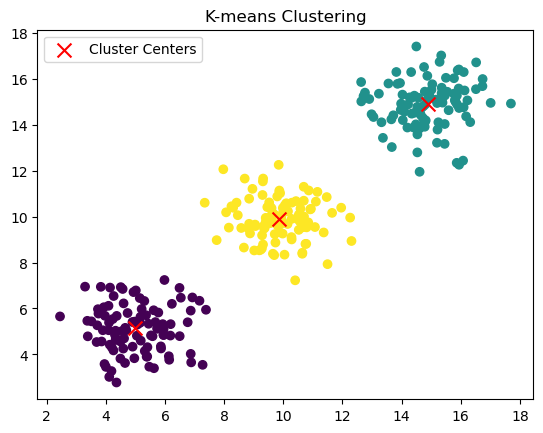

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 300
n_features = 2
n_clusters = 3

X = np.random.randn(n_samples, n_features)
X[:100] += 5  # Shift the first 100 points
X[100:200] += 10  # Shift the next 100 points
X[200:] += 15  # Shift the last 100 points

# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to initialize cluster centroids randomly
def initialize_centroids(X, n_clusters):
    indices = np.random.choice(len(X), n_clusters, replace=False)
    return X[indices]

# Function to assign each data point to the nearest centroid
def assign_to_clusters(X, centroids):
    n_samples = len(X)
    cluster_assignments = np.zeros(n_samples, dtype=int)
    
    for i in range(n_samples):
        distances = [euclidean_distance(X[i], centroid) for centroid in centroids]
        cluster_assignments[i] = np.argmin(distances)
    
    return cluster_assignments

# Function to update cluster centroids based on the mean of assigned data points
def update_centroids(X, cluster_assignments, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
#     print(cluster_assignments)
    
    for cluster in range(n_clusters):
        cluster_points = X[cluster_assignments == cluster]
#         print(cluster_points, '\n')
        if len(cluster_points) > 0:
            centroids[cluster] = np.mean(cluster_points, axis=0)
    
    return centroids

# Function to check for convergence
def has_converged(new_centroids, old_centroids, tol=1e-4):
    return np.all(np.abs(new_centroids - old_centroids) < tol)

# K-means clustering
def kmeans(X, n_clusters, max_iters=100):
    centroids = initialize_centroids(X, n_clusters)
#     print(centroids)
    
    for iteration in range(max_iters):
        cluster_assignments = assign_to_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_assignments, n_clusters)
        
        if has_converged(new_centroids, centroids):
            break
        
        centroids = new_centroids
    
    return cluster_assignments, centroids

# Perform K-means clustering
cluster_assignments, final_centroids = kmeans(X, n_clusters)

# Visualize the data and cluster centroids
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.legend()
plt.title('K-means Clustering')
plt.show()
